# 第７章単語ベクトル

> 単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示
> Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

https://drive.google.com/file/d/【GoogleドライブのファイルID】/edit
をwgetで取得するために
url="https://drive.google.com/uc?export=download&id=【GoogleドライブのファイルID】"の形式にする

In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/NLP100/GoogleNews-vectors-negative300.bin.gz', binary=True)

model["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [ ]:
# model.wv property, which holds the standalone keyed vectors
word_vectors = model.wv
word_vectors.save('vectors.kv')
reloaded_word_vectors = KeyedVectors.load('vectors.kv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [ ]:
reloaded_word_vectors['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. “United States”と”U.S.”のコサイン類似度を計算せよ．
>“United States”と”U.S.”のコサイン類似度を計算せよ．

In [ ]:
# Compute cosine similarity between two keys.
model.similarity('United_States', 'U.S.')

0.73107743

62. 類似度の高い単語10件  

>“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [ ]:
from gensim.models import KeyedVectors
model =  KeyedVectors.load('/content/drive/MyDrive/Colab Notebooks/NLP100/vectors.kv')

In [ ]:
# Find the top-N most similar keys. Positive keys contribute positively towards the similarity
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

## 63. 加法構成性によるアナロジー
>“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [ ]:
vec = model['Spain'] - model['madrid'] + model['Athens'] 
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

## 64. アナロジーデータでの実験
>単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [ ]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2021-06-15 06:03:05--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.203.128, 2607:f8b0:400c:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.203.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.002s  

2021-06-15 06:03:05 (299 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [ ]:
with open('./questions-words.txt', 'r') as f1, open('./questions-words-add.txt', 'w') as f2:
  for line in f1:  # f1から1行ずつ読込み、求めた単語と類似度を追加してf2に書込む
    line = line.split()
    if line[0] == ':':  # :の後にカテゴリ名
      category = line[1]
    else:
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]  # 返り値は最類似単語とコサイン類似度
      f2.write(' '.join([category] + line + [word, str(cos) + '\n']))

## 65. アナロジータスクでの正解率
>64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [ ]:
with open('./questions-words-add.txt', 'r') as f:
  sem_cnt = 0  # count
  sem_cor = 0  # correct
  syn_cnt = 0
  syn_cor = 0
  for line in f:
    line = line.split()
    if not line[0].startswith('gram'):  # カテゴリ名にgramがついてるものが文法的アナロジー
      sem_cnt += 1
      if line[4] == line[5]:
        sem_cor += 1
    else:
      syn_cnt += 1
      if line[4] == line[5]:
        syn_cor += 1

print(f'意味的アナロジー正解率: {sem_cor/sem_cnt:.3f}')
print(f'文法的アナロジー正解率: {syn_cor/syn_cnt:.3f}') 

意味的アナロジー正解率: 0.731
文法的アナロジー正解率: 0.740


## 66. WordSimilarity-353での評価
>The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [ ]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2021-06-15 08:50:14--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.02s   

2021-06-15 08:50:14 (944 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [ ]:
ws353 = []
with open('./combined.csv', 'r') as f:
  next(f)  # 初めの行は例なので飛ばす
  for line in f:  # 1行ずつ読込み、単語ベクトルと類似度を計算
    line = [s.strip() for s in line.split(',')]  # strip()で空白文字(スペースやタブ、改行)を取り除ける
    line.append(model.similarity(line[0], line[1]))
    ws353.append(line)

# 確認
for i in range(5):
  print(ws353[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [ ]:
a = [1]
a += [3]
print(a)

b = [1]
b.append(3)
print(b)

[1, 3]
[1, 3]


In [ ]:
import numpy as np
from scipy.stats import spearmanr

# スピアマン相関係数の計算
  # すなわち2つの変数の分布について何も仮定せずに、変数の間の関係が任意の単調関数によってどの程度忠実に表現できるかを、評価するもの
human = np.array(ws353).T[2]
w2v = np.array(ws353).T[3]
correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数: {correlation:.3f}')

スピアマン相関係数: 0.685


## 67. k-meansクラスタリング
>国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [ ]:
# 国名の取得
countries = set()  # 重複回避
with open('./questions-words-add.txt') as f:
  for line in f:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:  # 単語アナロジーの評価データから国名収集
      countries.add(line[2])  # 国名がある位置
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
countries = list(countries)

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]

In [ ]:
from sklearn.cluster import KMeans

# k-meansクラスタリング
  # k-means法は、まずデータを適当なクラスタに分けた後、クラスタの平均を用いてうまい具合にデータがわかれるように調整させていくアルゴリズムです。
  # 任意の指定のk個のクラスタを作成するアルゴリズムであることから、k-means法(k点平均法と呼ばれています。)
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Iraq, Iran, Egypt, Lebanon, Israel, Qatar, Sudan, Syria, Bahrain, Pakistan, Jordan, Libya, Afghanistan, Eritrea, Somalia, Oman
cluster 1
Armenia, Hungary, Azerbaijan, Russia, Turkmenistan, Croatia, Slovakia, Belarus, Kazakhstan, Poland, Greece, Bulgaria, Turkey, Estonia, Latvia, Kyrgyzstan, Macedonia, Montenegro, Slovenia, Georgia, Uzbekistan, Serbia, Ukraine, Moldova, Lithuania, Cyprus, Albania, Tajikistan, Romania
cluster 2
Germany, Austria, Sweden, France, USA, Norway, Iceland, Malta, Argentina, Ireland, Portugal, Spain, Netherlands, Greenland, Liechtenstein, Switzerland, Finland, Denmark, Europe, Italy, England, Canada, Belgium, Uruguay, Morocco
cluster 3
Guinea, Kenya, Malawi, Mozambique, Rwanda, Niger, Algeria, Botswana, Tunisia, Zimbabwe, Gabon, Ghana, Zambia, Mauritania, Mali, Namibia, Gambia, Madagascar, Angola, Liberia, Uganda, Burundi, Nigeria, Senegal
cluster 4
Dominica, Thailand, China, Bahamas, Japan, Cuba, Mexico, Malaysia, Brazil, Bangladesh, Nepal, Bhutan, Ch

参照：https://qiita.com/g-k/items/0d5d22a12a4507ecbf11

## 68. Ward法によるクラスタリング
>国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

参照：https://mathwords.net/wardmethod

１．全ての点が別々のクラスタである状態から始めて  
２．「今あるクラスタの中で、最も距離が近い２つのクラスタを選んで１つのクラスタに合体する」という操作（図参照）を  
３．目標のクラスタ数になるまで続ける  
手法

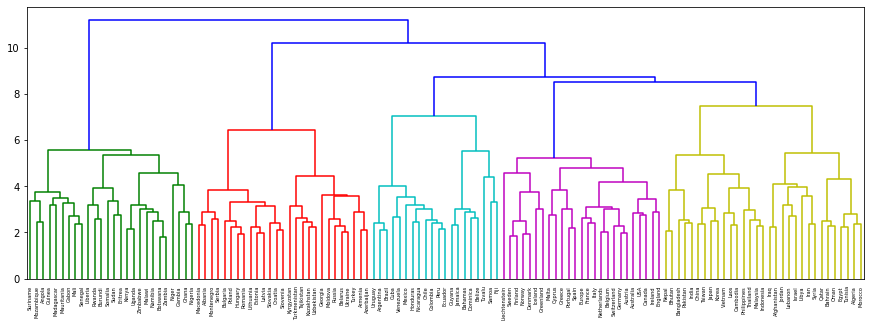

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()

## 69. t-SNEによる可視化
>国名に関する単語ベクトルのベクトル空間をt-SNEで可視化せよ．

In [ ]:
!pip install bhtsne

     |████████████████████████████████| 92kB 2.8MB/s 
  Created wheel for bhtsne: filename=bhtsne-0.1.9-cp37-cp37m-linux_x86_64.whl size=214518 sha256=775a96da190938c82cff63e222bd39aede677a303b2b0776450e28d4078d95fe
  Stored in directory: /root/.cache/pip/wheels/d3/11/da/b469506296148e4a04bb3bd5083052a2c5d44709851ed17c21
Successfully built bhtsne


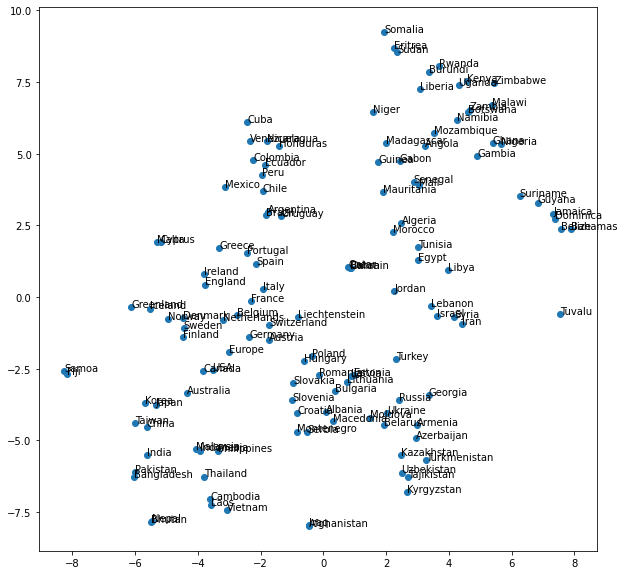

In [ ]:
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123)
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()